In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
from configparser import ConfigParser
import os
import deepdish as dd
import pandas as pd
import pycbc.conversions as convert
import pylab as plt
from glob import glob
import h5py
import numpy as np
from scipy.interpolate import UnivariateSpline

# From GWForge

In [46]:
#config_file = 'bns.ini'
pop_num = 5
config_file = f'../../A-sharp-study/input_population/BBH/bbh{pop_num}.ini'
#config_file = '../calc_SNR_next_gen/param_data_files/Test/bns.ini'
cbc = 'bbh'
f_ref = 10

In [47]:
cp = ConfigParser()
cp.read(config_file)

['../../A-sharp-study/input_population/BBH/bbh5.ini']

In [48]:
mass_model_names = {'PowerLaw+Peak':'PLP', 
                    'UniformSecondary':'US', 
                    'DoubleGaussian':'DG',
                    'PowerLaw':'PL'}
spin_config_names = {'Isotropic-Bilby':'prec', 
                     'Beta-Aligned':'aligned',
                     'Aligned-Uniform':'AU'}
z_model_names = {'MadauDickinson':'MD'}

In [49]:
mass_model = mass_model_names[cp['Mass']['mass-model']]
spin_config = spin_config_names[cp['Spin']['spin-model']]
z_model = z_model_names[cp['Redshift']['redshift-model']]
z_params = eval(cp['Redshift']['redshift-parameters'])
if z_params['z_peak'] > 1.9:
    z_model = z_model+'high'
elif z_params['z_peak'] < 1.9:
    z_model = z_model+'low'
max_z = cp['Redshift']['maximum-redshift']

try:
    duration = int(cp['Redshift']['duration'])/86400
except KeyError:
    duration = 365.0

if duration.is_integer():
    duration = int(duration)
if duration == 1:
    unit = 'day'
else:
    unit = 'days'
duration_name = f'{duration}_{unit}'

In [50]:
mass_model, spin_config, z_model, max_z, duration_name

('PLP', 'prec', 'MDlow', '10', '365_days')

In [51]:
gwforge_population = '/home/divyajyoti/miniconda3/envs/spe_ngloc_mygwf_mypycbc/bin/gwforge_population'
out_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/input_population/'
#out_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/localization_next_gen/BNS/run03/'

In [52]:
output_file = os.path.join(out_dir, str.upper(cbc), 
                           '_'.join([f'{pop_num}_pop', 
                                     mass_model, 
                                     'spin', spin_config, 
                                     'fref', str(f_ref), 
                                     'z', z_model, 'zp', str(z_params['z_peak']), 'zmax', max_z, 
                                     'lmrd', cp['Redshift']['local-merger-rate-density'], duration_name, 'corrected_td']) + '.h5')

In [53]:
#output_file = os.path.join(out_dir, str.upper(cbc), 'injections',
#                           '_'.join(['1_pop', mass_model, 'spin', spin_config, 'z', z_model, 'zmax', max_z, 
#                                     'lmrd', cp['Redshift']['local-merger-rate-density'],
#                                     duration_name, 'corrected_td', 'part1']) + '.h5')

In [54]:
output_file

'/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/input_population/BBH/5_pop_PLP_spin_prec_fref_10_z_MDlow_zp_1.54_zmax_10_lmrd_22_365_days_corrected_td.h5'

In [55]:
os.system(f'{gwforge_population} \
                --config-file {config_file} \
                --source-type {cbc} \
                --output-file {output_file} \
                --reference-frequency {f_ref} \
                --save-config')

2025-10-14 22:45:56 Generating redshift samples
2025-10-14 22:45:56 Generating samples assumming Madau-Dickinson Model


Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:16% 0:00:010:00:01
Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:17% 0:00:010:00:01


/home/divyajyoti/miniconda3/envs/spe_ngloc_mygwf_mypycbc/lib/python3.11/site-packages/pycbc/population/population_models.py:387: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  total_rate = scipy_integrate.quad(
2025-10-14 22:46:39 Average time interval between signals = 1386.51
2025-10-14 22:46:39 Number of samples generated = 22760
2025-10-14 22:46:39 Generating mass samples
/home/divyajyoti/miniconda3/envs/spe_ngloc_mygwf_mypycbc/lib/python3.11/site-packages/gwpopulation/models/mass.py:631: RuntimeWarning: invalid value encountered in divide
  p_q /= self.norm_p_q(beta=beta, mmin=mmin, delta_m=delta_m)
2025-10-14 22:47:29 Generating spin samples
2025-10-14 22:47:29 Generating spin samples from Isotropic Spin Distribution
2025-10-14 22:47:29 Generating extrinsic parameters
2025-10-14 22:47:29 No 'extrinsic_prior_file' provided. Using default priors
2025-10-14 22:47:

0

In [56]:
with h5py.File(output_file, 'r') as f:
    print(f.keys())
    print(f['reference_frequency'][()])

<KeysViewHDF5 ['a_1', 'a_2', 'chi_1_in_plane', 'chi_2_in_plane', 'chi_eff', 'chi_p', 'chirp_mass', 'chirp_mass_source', 'config', 'cos_tilt_1', 'cos_tilt_2', 'dec', 'geocent_time', 'iota', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl', 'psi', 'ra', 'redshift', 'reference_frequency', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z', 'symmetric_mass_ratio', 'theta_jn', 'tilt_1', 'tilt_2', 'time_interval', 'total_mass', 'total_mass_source']>
[10. 10. 10. ... 10. 10. 10.]


# From Ish Gupta et al.

In [2]:
mpsac_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/Relevant_papers/Ish Gupta_et_al_data/'

In [3]:
param_name_map = {'DL': 'luminosity_distance',
                  'Mc': 'chirp_mass',
                  'chi1x': 'spin_1x',
                  'chi1y': 'spin_1y',
                  'chi1z': 'spin_1z',
                  'chi2x': 'spin_2x',
                  'chi2y': 'spin_2y',
                  'chi2z': 'spin_2z',
                  'phic': 'phase',
                  'tc': 'geocent_time',
                  'z': 'redshift'}

In [4]:
def plot_scatter(parent_data, param, err, colourbar, 
                 netw='HLI', detected_mask=None, xscale='linear', yscale='log', 
                 colrbar_param_from='networks'):
    # Extract the relevant data
    if type(detected_mask) == type(None):
        detected_mask = np.array([True]*len(parent_data['inj_params'][param]))
    else:
        plt.title('Detected binaries')
    param_arr = parent_data['inj_params'][param][detected_mask]
    err_arr = parent_data['networks'][netw][err][detected_mask]
    
    if colrbar_param_from == 'networks':
        colrbar_arr = parent_data['networks'][netw][colourbar][detected_mask]
    elif colrbar_param_from == 'inj_params':
        colrbar_arr = parent_data['inj_params'][colourbar][detected_mask]
    
    # Sort indices by SNR in ascending order
    sort_idx = np.argsort(colrbar_arr)
    
    # Reorder data by sorted indices
    param_sorted = param_arr[sort_idx]
    err_sorted = err_arr[sort_idx]
    colrbar_sorted = colrbar_arr[sort_idx]
    
    # Scatter plot with sorted data
    plt.scatter(param_sorted, err_sorted, c=colrbar_sorted)
    plt.colorbar(label=colourbar)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlabel(param)
    plt.ylabel('$\Delta$ ('+err+')')
    plt.grid(ls=':')

In [5]:
def plot_scatter_direct(x, y, c):    
    # Sort indices by SNR in ascending order
    sort_idx = np.argsort(c)
    
    # Reorder data by sorted indices
    x_sorted = x[sort_idx]
    y_sorted = y[sort_idx]
    c_sorted = c[sort_idx]
    
    # Scatter plot with sorted data
    plt.scatter(x_sorted, y_sorted, c=c_sorted)

In [6]:
def get_delta_z_from_delta_DL(z, DL, delta_DL):
    sort_idx = np.argsort(DL)
    DL_sorted = DL[sort_idx]
    z_sorted = z[sort_idx]
    delta_DL_sorted = delta_DL[sort_idx]
    
    fz = UnivariateSpline(DL_sorted, z_sorted)
    dfz = fz.derivative()
    delta_z = dfz(DL) * delta_DL
    return(delta_z)

In [7]:
def create_detected_mask(input_arr, snr_threshold=10):
    return(input_arr['snr'] > snr_threshold)

## BNS

In [4]:
with h5py.File(glob(os.path.join(mpsac_dir, '*', '*', '*bns-*hdf5'))[0], 'r') as file:
    for key in file.keys(): 
        print(key)
        print(file[key].keys())
        print('\n')
    print('CE20LET:', file['networks']['CE20LET'].keys())
    #print(file['inj_params']['eta'][:100])
    #print(file['networks']['HLI']['m1'][:100])

inj_params
<KeysViewHDF5 ['DL', 'Mc', 'chi1x', 'chi1y', 'chi1z', 'chi2x', 'chi2y', 'chi2z', 'dec', 'eta', 'gmst0', 'iota', 'log_DL', 'log_Mc', 'phic', 'psi', 'ra', 'tc', 'z']>


networks
<KeysViewHDF5 ['CE20LET', 'CE20LI', 'CE4020ET', 'CE4020I', 'CE40LET', 'CE40LI', 'HLET', 'HLI']>


CE20LET: <KeysViewHDF5 ['chi1z', 'chi2z', 'cond_num', 'cov_MC_eta', 'dec', 'eta', 'inv_cond', 'inv_err', 'iota', 'log_DL', 'log_Mc', 'm1', 'm2', 'phic', 'psi', 'ra', 'sky_area_90', 'snr', 'tau_120', 'tau_300', 'tau_60', 'tau_600', 'tc']>


In [5]:
imp_inj_keys = ['DL', 'Mc', 'eta', 'z']
imp_netws = ['HLI']
imp_err_keys = ['eta', 'iota', 'log_DL', 'log_Mc', 'sky_area_90', 'snr']

In [6]:
mpsac_data_bns = {}
with h5py.File(glob(os.path.join(mpsac_dir, '*', '*', '*bns-*hdf5'))[0], 'r') as file:
    for key in file.keys(): 
        mpsac_data_bns[key] = {}
    
    for key in imp_inj_keys:
        if key in param_name_map.keys():
            mapped_key = param_name_map[key]
        else:
            mapped_key = key
        mpsac_data_bns['inj_params'][mapped_key] = file['inj_params'][key][:]

    for key in imp_netws:
        mpsac_data_bns['networks'][key] = {}
        for err in imp_err_keys:
            mpsac_data_bns['networks'][key][err] = file['networks'][key][err][:]

In [7]:
mpsac_data_bns

{'inj_params': {'luminosity_distance': array([1.97564531e+02, 1.97797111e+02, 2.07786129e+02, ...,
         2.27309820e+05, 2.27000237e+05, 2.20429873e+05]),
  'chirp_mass': array([ 1.22283594,  1.51607094,  1.16967369, ..., 24.44794042,
         33.60919428, 34.51119397]),
  'eta': array([0.24983179, 0.2497844 , 0.24972332, ..., 0.24908213, 0.24525518,
         0.24946428]),
  'redshift': array([ 0.04318128,  0.04323058,  0.0453449 , ..., 19.78084953,
         19.7564263 , 19.23761566])},
 'networks': {'HLI': {'eta': array([0.0140666 , 0.05482185, 0.02524028, ..., 0.04386107, 0.12193353,
          0.09013914], dtype=float32),
   'iota': array([ 2.1688662 ,  0.5170791 ,  0.16503876, ..., 24.586922  ,
          12.938496  ,  4.302997  ], dtype=float32),
   'log_DL': array([ 1.2346141 ,  0.50450534,  0.1263973 , ...,  2.8655977 ,
           4.221069  , 10.239427  ], dtype=float32),
   'log_Mc': array([5.5991131e-05, 1.8808963e-04, 7.8349345e-05, ..., 2.1217079e-01,
          4.5415449e-0

In [10]:
detected = mpsac_data_bns['networks']['HLI']['snr'] > 10
detected

array([ True,  True,  True, ..., False, False, False])

In [11]:
len(mpsac_data_bns['inj_params']['luminosity_distance']), len(mpsac_data_bns['inj_params']['luminosity_distance'][detected])

(1282057, 1297)

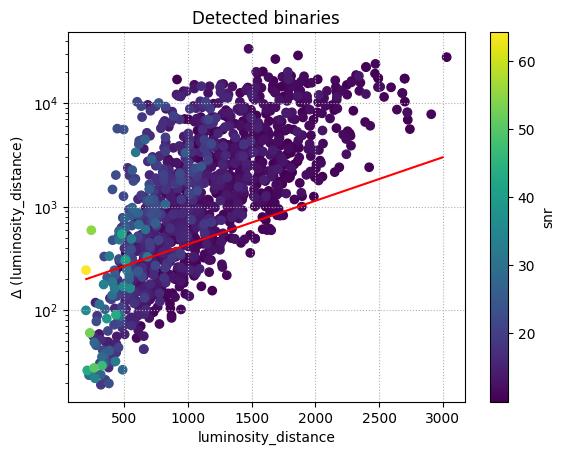

In [66]:
plot_scatter(mpsac_data_bns, 'luminosity_distance', 'log_DL', 'snr', detected_mask=detected)
plt.plot([200, 3000], [200, 3000], 'r')

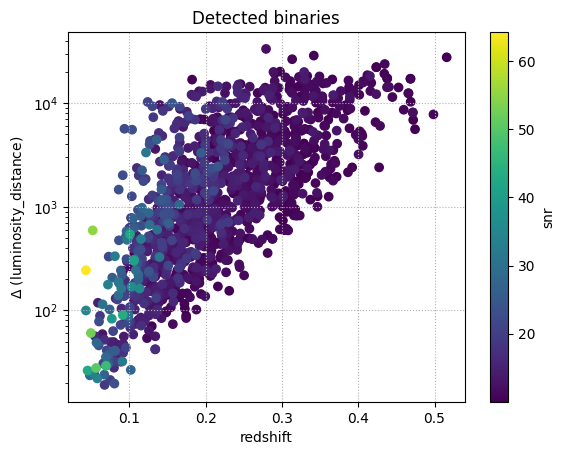

In [64]:
plot_scatter(mpsac_data_bns, 'redshift', 'log_DL', 'snr', detected_mask=detected)
#plt.plot([200, 3000], [200, 3000], 'r')

In [41]:
mpsac_found = mpsac_data['BNS']['networks']['HLI']['snr'] > 10

(array([  0.,   0., 853., 508., 335., 243., 162., 112.,  86.,  66.,  59.,
         39.,  31.]),
 array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.,
        19.]),
 [<matplotlib.patches.Polygon at 0x7cdda1a31950>])

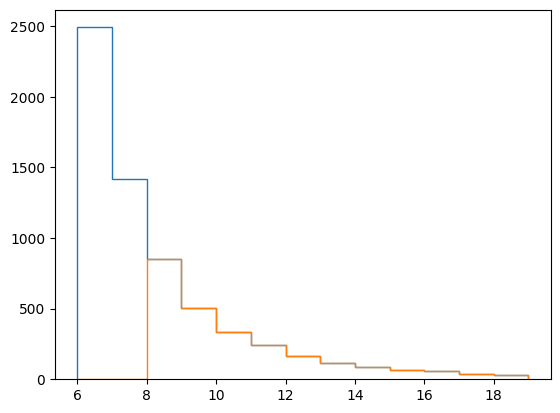

In [32]:
plt.hist(mpsac_data['BNS']['networks']['HLI']['snr'], bins=np.arange(6,20), histtype=u'step');
plt.hist(mpsac_data['BNS']['networks']['HLI']['snr'][mpsac_found], np.arange(6,20), histtype=u'step')

## BBH

In [8]:
with h5py.File(glob(os.path.join(mpsac_dir, '*', '*', '*bbh*hdf5'))[0], 'r') as file:
    for key in file.keys(): 
        print(key)
        print(file[key].keys())
        print('\n')
    print('CE20LET:', file['networks']['CE20LET'].keys())
    #print(file['inj_params']['eta'][:100])
    #print(file['networks']['HLI']['m1'][:100])

inj_params
<KeysViewHDF5 ['DL', 'Mc', 'chi1x', 'chi1y', 'chi1z', 'chi2x', 'chi2y', 'chi2z', 'dec', 'eta', 'gmst0', 'iota', 'log_DL', 'log_Mc', 'phic', 'psi', 'ra', 'tc', 'z']>


networks
<KeysViewHDF5 ['CE20LET', 'CE20LI', 'CE4020ET', 'CE4020I', 'CE40LET', 'CE40LI', 'HLET', 'HLI']>


CE20LET: <KeysViewHDF5 ['chi1z', 'chi2z', 'cond_num', 'cov_MC_eta', 'dec', 'eta', 'inv_cond', 'inv_err', 'iota', 'log_DL', 'log_Mc', 'm1', 'm2', 'phic', 'pm_snr', 'psi', 'ra', 'sky_area_90', 'snr', 'tc']>


In [9]:
imp_inj_keys = ['DL', 'Mc', 'eta', 'z']
imp_netws = ['HLI']
imp_err_keys = ['eta', 'iota', 'log_DL', 'log_Mc', 'sky_area_90', 'snr', 'cov_MC_eta']

In [15]:
mpsac_data_bbh = {}
with h5py.File(glob(os.path.join(mpsac_dir, '*', '*', '*bbh*hdf5'))[0], 'r') as file:
    print({key:file['inj_params'][key][i] for key in file['inj_params'].keys()})
    print({key:file['networks']['HLI'][key][i]})
    for key in file.keys(): 
        mpsac_data_bbh[key] = {}
    
    for key in imp_inj_keys:
        if key in param_name_map.keys():
            mapped_key = param_name_map[key]
        else:
            mapped_key = key
        mpsac_data_bbh['inj_params'][mapped_key] = file['inj_params'][key][:]

    for key in imp_netws:
        mpsac_data_bbh['networks'][key] = {}
        for err in imp_err_keys:
            mpsac_data_bbh['networks'][key][err] = file['networks'][key][err][:]

{'DL': 474.1709682225321, 'Mc': 9.439571015637082, 'chi1x': 0.0, 'chi1y': 0.0, 'chi1z': 0.1701470449757652, 'chi2x': 0.0, 'chi2y': 0.0, 'chi2z': 0.35561788318888615, 'dec': 1.0740925877403926, 'eta': 0.2445565581659722, 'gmst0': 44958.217426017385, 'iota': 0.9838499321465579, 'log_DL': 6.161567949113791, 'log_Mc': 2.2449105358660493, 'phic': 0.0, 'psi': 0.9903880957572408, 'ra': 4.6022650908858305, 'tc': 0.0, 'z': 0.09967445290857498}


In [ ]:
mpsac_data_bbh['inj_params'][]

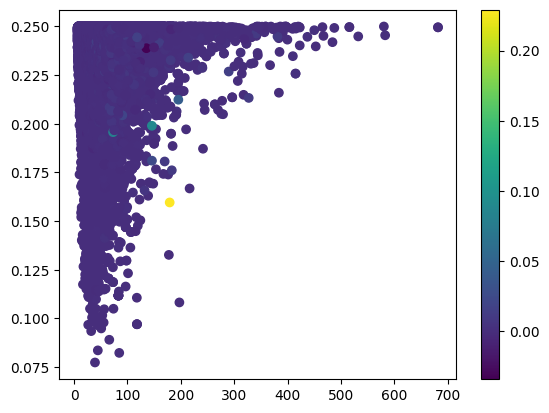

In [17]:
plt.scatter(mpsac_data_bbh['inj_params']['chirp_mass'], mpsac_data_bbh['inj_params']['eta'], c=mpsac_data_bbh['networks']['HLI']['cov_MC_eta'])
plt.colorbar()

In [11]:
mpsac_data_bbh['inj_params']['mtotal'] = convert.mtotal_from_mchirp_eta(mpsac_data_bbh['inj_params']['chirp_mass'], 
                                                                        mpsac_data_bbh['inj_params']['eta'])
mpsac_data_bbh['inj_params']['mtotal_source'] = mpsac_data_bbh['inj_params']['mtotal'] / (1 + mpsac_data_bbh['inj_params']['redshift'])
mpsac_data_bbh['networks']['HLI']['DL'] = mpsac_data_bbh['networks']['HLI']['log_DL'] * mpsac_data_bbh['inj_params']['luminosity_distance']
mpsac_data_bbh['networks']['HLI']['Mc'] = mpsac_data_bbh['networks']['HLI']['log_Mc'] * mpsac_data_bbh['inj_params']['chirp_mass']
mpsac_data_bbh['networks']['HLI']['z'] = get_delta_z_from_delta_DL(mpsac_data_bbh['inj_params']['redshift'], 
                                                                   mpsac_data_bbh['inj_params']['luminosity_distance'], 
                                                                   mpsac_data_bbh['networks']['HLI']['DL'])
mpsac_data_bbh['networks']['HLI']['log_z'] = mpsac_data_bbh['networks']['HLI']['z']/mpsac_data_bbh['inj_params']['redshift']
mpsac_data_bbh

{'inj_params': {'luminosity_distance': array([   431.65211111,    474.17096822,    491.61299545, ...,
         344664.25298335, 368854.55707485, 395670.08906769]),
  'chirp_mass': array([  7.81837399,   9.43957102,   6.77745022, ..., 452.57641044,
         336.22978247, 194.41870273]),
  'eta': array([0.24205864, 0.24455656, 0.24796516, ..., 0.2397659 , 0.23119164,
         0.24930034]),
  'redshift': array([ 0.09124781,  0.09967445,  0.10310672, ..., 28.92537236,
         30.7882194 , 32.8464409 ]),
  'mtotal': array([  18.31319372,   21.97478679,   15.64703084, ..., 1066.15281641,
          809.56719234,  447.40859263]),
  'mtotal_source': array([16.78188366, 19.9829929 , 14.18451237, ..., 35.62705264,
         25.46752249, 13.21877813])},
 'networks': {'HLI': {'eta': array([8.06144846e-04, 2.18096640e-04, 2.96311191e-04, ...,
          2.49428973e-01, 1.19393185e-01, 2.89524384e-02]),
   'iota': array([0.06528956, 0.04224183, 0.20663448, ..., 3.86633325, 2.57984591,
          1.9577

In [12]:
detected = mpsac_data_bbh['networks']['HLI']['snr'] > 10

In [13]:
len(mpsac_data_bbh['inj_params']['luminosity_distance']), len(mpsac_data_bbh['inj_params']['luminosity_distance'][detected])

(96129, 15873)

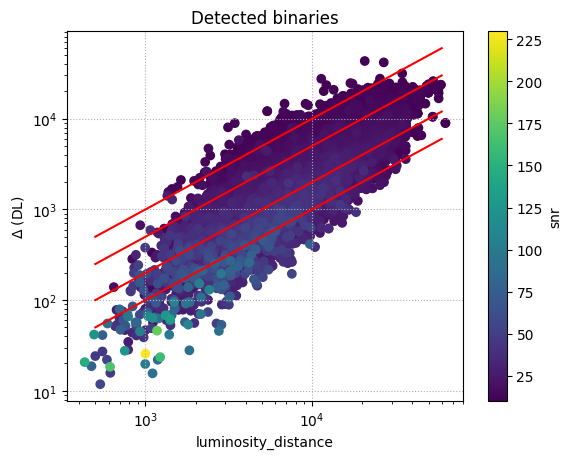

In [14]:
plot_scatter(mpsac_data_bbh, 'luminosity_distance', 'DL', 'snr', detected_mask=detected, xscale='log')
for perc in [0.1, 0.2, 0.5, 1]:
    plt.plot([500, 6e4], np.array([500, 6e4])*perc, 'r')

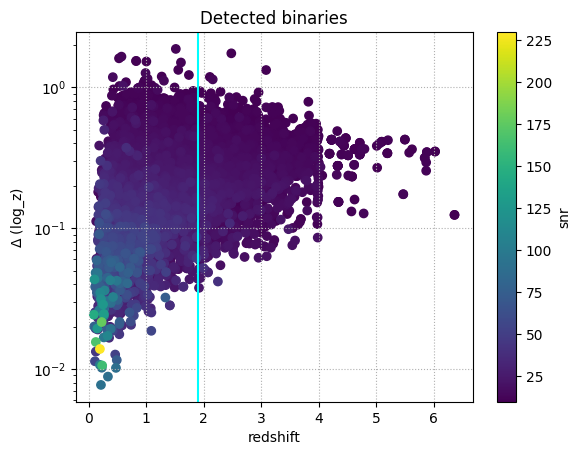

In [15]:
plot_scatter(mpsac_data_bbh, 'redshift', 'log_z', 'snr', detected_mask=detected)
plt.axvline(1.9, c='cyan')
#plt.plot(np.arange(1e-3,7,0.1), np.arange(1e-3,7,0.1), 'r')

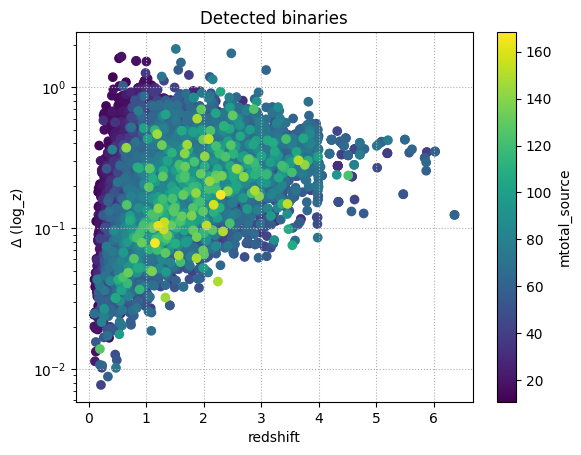

In [16]:
plot_scatter(mpsac_data_bbh, 'redshift', 'log_z', 'mtotal_source', 
             detected_mask=detected, colrbar_param_from='inj_params')

In [19]:
select_bool_arrs = {}
select_bool_arrs['z'] = ((mpsac_data_bbh['inj_params']['redshift'] > 1.5) & (mpsac_data_bbh['inj_params']['redshift'] < 2.5))
select_bool_arrs['M'] = ((mpsac_data_bbh['inj_params']['mtotal_source']) > 50)
select_bool_arrs['z_and_M'] = (select_M & select_z)

selected_arrs = {}
for select_key in ['M', 'z', 'z_and_M']:
    selected_arrs[select_key] = {'redshift': mpsac_data_bbh['inj_params']['redshift'][select_bool_arrs[select_key]], 
                                 'err_log_z': mpsac_data_bbh['networks']['HLI']['log_z'][select_bool_arrs[select_key]], 
                                 'snr': mpsac_data_bbh['networks']['HLI']['snr'][select_bool_arrs[select_key]], 
                                 'mtotal': mpsac_data_bbh['inj_params']['mtotal'][select_bool_arrs[select_key]], 
                                 'mtotal_source': mpsac_data_bbh['inj_params']['mtotal_source'][select_bool_arrs[select_key]]}

In [22]:
len(selected_arrs['z_and_M']['redshift'])

3543

Text(0.5, 1.0, 'SNR > 10, M > 50')

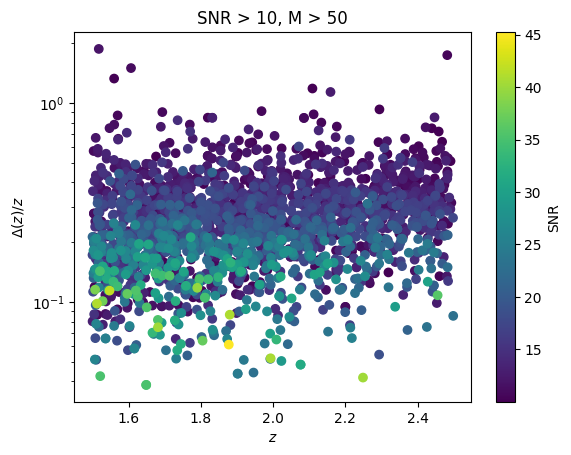

In [28]:
det_mask = create_detected_mask(selected_arrs['z_and_M'])
plot_scatter_direct(selected_arrs['z_and_M']['redshift'][det_mask], 
                    selected_arrs['z_and_M']['err_log_z'][det_mask], 
                    selected_arrs['z_and_M']['snr'][det_mask])
plt.colorbar(label='SNR')
plt.yscale('log')
plt.xlabel('$z$')
plt.ylabel('$\Delta(z) / z$')
plt.title('SNR > 10, M > 50')

Text(0.5, 1.0, 'SNR > 10, M > 50')

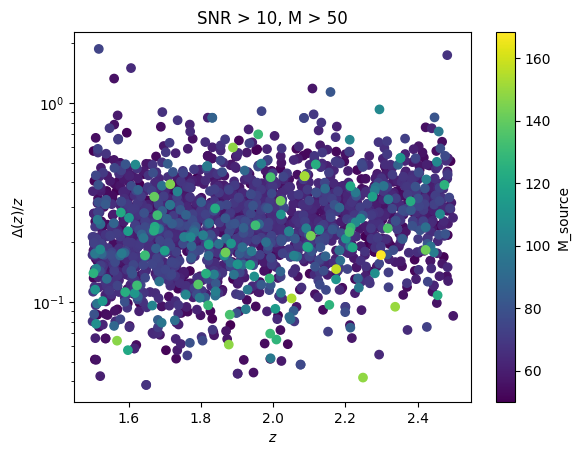

In [30]:
det_mask = create_detected_mask(selected_arrs['z_and_M'])
plot_scatter_direct(selected_arrs['z_and_M']['redshift'][det_mask], 
                    selected_arrs['z_and_M']['err_log_z'][det_mask], 
                    selected_arrs['z_and_M']['mtotal_source'][det_mask])
plt.colorbar(label='M_source')
plt.yscale('log')
plt.xlabel('$z$')
plt.ylabel('$\Delta(z) / z$')
plt.title('SNR > 10, M > 50')

Text(0.5, 1.0, 'Detected binaries')

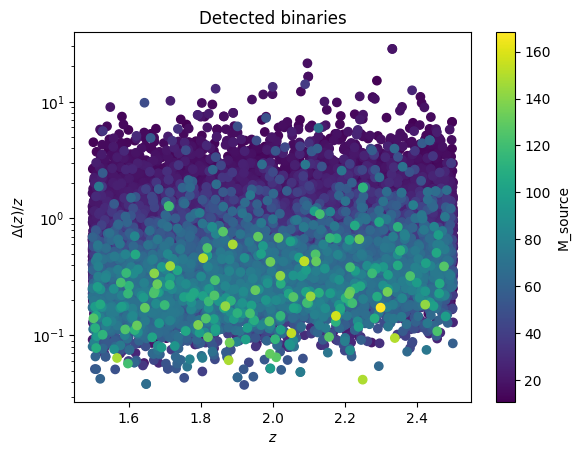

In [99]:
plot_scatter_direct(selected['redshift'], selected['err_log_z'], selected['mtotal_source'])
plt.colorbar(label='M_source')
plt.yscale('log')
plt.xlabel('$z$')
plt.ylabel('$\Delta(z) / z$')
plt.title('Detected binaries')

In [106]:
mass_mask = selected['mtotal_source'] > 50

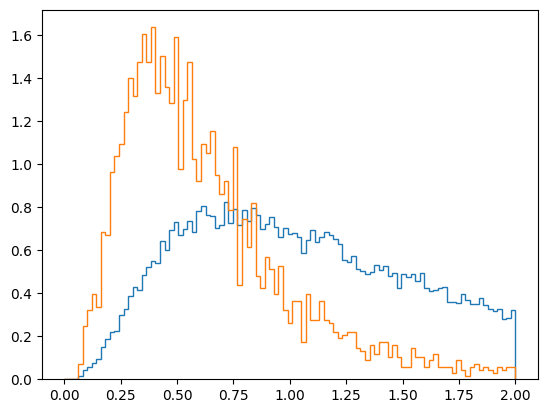

In [108]:
plt.hist(selected['err_log_z']*selected['redshift'], bins=np.linspace(0,2,100), histtype=u'step', density=True);
plt.hist(selected['err_log_z'][mass_mask]*selected['redshift'][mass_mask], bins=np.linspace(0,2,100), histtype=u'step', density=True);

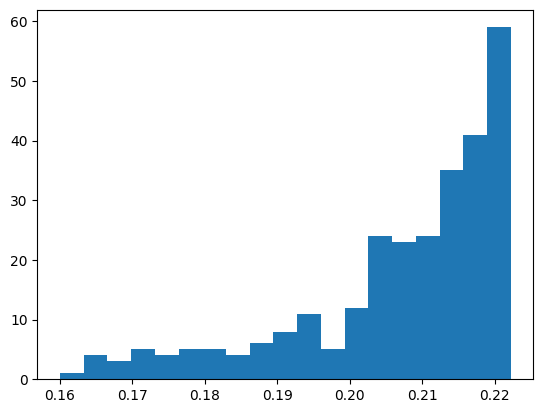

In [114]:
plt.hist(mpsac_data_bbh['inj_params']['eta'][select_z][mass_mask], bins=np.linspace(0.16, 2/9, 20));